<a href="https://colab.research.google.com/github/oneryigit/for_my_reference/blob/main/Margins_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marginal Effect Plot (Out of Sample Plot)


*   This notebook explains how to implement out of sample prediction using Python. It is also known as marginal effect plot.
*   No one has done marginal effect plot in Python. So I decided to do it.


In [1]:
#Import some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_stata('auto.dta') 
#this dataset is a STATA built in dataset.
#To reach out the data, simply write in the command section: sysuse auto.dta and run.  

df.head() #let's see the a few rows of the data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


In [3]:
df.describe().T #some info about the data

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.256757,2949.495885,3291.00,4220.25,5006.500,6332.2500,15906.00
mpg,74.0,21.297297,5.785503,12.00,18.00,20.000,24.7500,41.00
rep78,69.0,3.405797,0.989932,1.00,3.00,3.000,4.0000,5.00
headroom,74.0,2.993243,0.845995,1.50,2.50,3.000,3.5000,5.00
trunk,74.0,13.756757,4.277404,5.00,10.25,14.000,16.7500,23.00
weight,74.0,3019.459459,777.193567,1760.00,2250.00,3190.000,3600.0000,4840.00
length,74.0,187.932432,22.266340,142.00,170.00,192.500,203.7500,233.00
turn,74.0,39.648649,4.399354,31.00,36.00,40.000,43.0000,51.00
displacement,74.0,197.297297,91.837219,79.00,119.00,196.000,245.2500,425.00
gear_ratio,74.0,3.014865,0.456287,2.19,2.73,2.955,3.3525,3.89


In [4]:
#Run the OLS model

model = smf.ols(formula= 'price ~ mpg + weight + length', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     12.98
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           7.85e-07
Time:                        04:45:22   Log-Likelihood:                -679.35
No. Observations:                  74   AIC:                             1367.
Df Residuals:                      70   BIC:                             1376.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.454e+04   5890.632      2.469      0.0

In [5]:
model.params #coefficents


Intercept    14542.434398
mpg            -86.789284
weight           4.364798
length        -104.868172
dtype: float64

In [6]:
#this part is important. We create a dataset that has 100 observation
# we range the data based on our main independent variable, which is "mpg", min and max values. 
#We want to have a range that represent independent variable. 
#this line of command does the job for us.  

df_oos=pd.DataFrame(np.linspace(12, 41, 100), columns=['mpg']) #n=100

df_oos


,mpg
0,12.000000
1,12.292929
2,12.585859
3,12.878788
4,13.171717
...,...
95,39.828283
96,40.121212
97,40.414141
98,40.707071


In [7]:
# Set the rest of variables at their respective values, such as mean, median, max or min.
# This is based on your need. 
# Our control variables are continuous variables, so it makes sense to set them at their mean. 
# Our goal is to understand the effect or magnitude of MPG on price while controling others, 
#we set other control variables at a constant value. In this case, mean. 

df_oos['weight']= df['weight'].mean()
df_oos['length']=df['length'].mean()

df_oos #so our dataset now contains IV and two other control variables. Note that their name are identical with the actual dataset, which is "df".

#as you can see mpg ranges from 12 to 41. and the other variables are at their mean.

,mpg,weight,length
0,12.000000,3019.459459,187.932432
1,12.292929,3019.459459,187.932432
2,12.585859,3019.459459,187.932432
3,12.878788,3019.459459,187.932432
4,13.171717,3019.459459,187.932432
...,...,...,...
95,39.828283,3019.459459,187.932432
96,40.121212,3019.459459,187.932432
97,40.414141,3019.459459,187.932432
98,40.707071,3019.459459,187.932432


In [8]:
#Lets look at our coefficents again
model.params

Intercept    14542.434398
mpg            -86.789284
weight           4.364798
length        -104.868172
dtype: float64

In [9]:
#model.params[0] = Intercept 
#model.params[1] = mpg
#and so on...
#Here we create our formula based on df_oos, which we created above. Not based on actual data points.

yhat1= model.params[0] + model.params[1]*df_oos['mpg'] + model.params[2]*df_oos['weight'] + model.params[3]*df_oos['length']

#yhat1= 14542.434398 - 86.789284*mpg + 4.364798*weight - 104.868172*length

In [10]:
#based on our "fake" dataset, we predict yhat values, which is price of a car.
#Again, note these are not based on real prediction that model provides.
#we would use "model.predict()" command to look at the real predictions. 
#yhat1 is based on our out of sample dataset. 

yhat1

0     6972.162530
1     6946.739407
2     6921.316283
3     6895.893160
4     6870.470036
         ...     
95    4556.965795
96    4531.542671
97    4506.119548
98    4480.696424
99    4455.273301
Length: 100, dtype: float64

In [11]:
# To calculate confidence interval, we need standard errors of predictions. 

#this is how we do. 
# We want our actual model to use not real values of IV and control variables,
# but the variables we created based on their respective values. 
# the command below tells the model to use the variables in the df_oos.

pred=model.get_prediction(df_oos)

pred.summary_frame() #based on out of sample data, we can see the se(mean_se).

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6972.162530,829.386396,5318.003523,8626.321537,1880.291599,12064.033461
1,6946.739407,806.290838,5338.643036,8554.835777,1869.645603,12023.833211
2,6921.316283,783.286233,5359.101152,8483.531414,1858.567655,11984.064912
3,6895.893160,760.380834,5379.361406,8412.424914,1847.054073,11944.732246
4,6870.470036,737.583885,5399.405364,8341.534708,1835.101248,11905.838824
...,...,...,...,...,...,...
95,4556.965795,1580.674145,1404.410618,7709.520972,-1198.858360,10312.789950
96,4531.542671,1604.878762,1330.712909,7732.372434,-1250.863292,10313.948635
97,4506.119548,1629.094906,1256.992211,7755.246885,-1303.160615,10315.399711
98,4480.696424,1653.322069,1183.249532,7778.143317,-1355.746291,10317.139139


In [12]:
model_oos=pred.summary_frame() #lets save the above parameters as model_oos. 

In [13]:
se0=model_oos['mean_se'] #to assign standard errors of linear predictions a variable called se0. 

In [14]:
ub= yhat1+(1.96*se0) #find upper confidence interval at %95

lb= yhat1-(1.96*se0) #find lower confidence interval

### We have everything we need. We find yhats based on out of sample dataset. We have confidence intervals. Now, lets plot the predicted yhats across the range of our main IV.

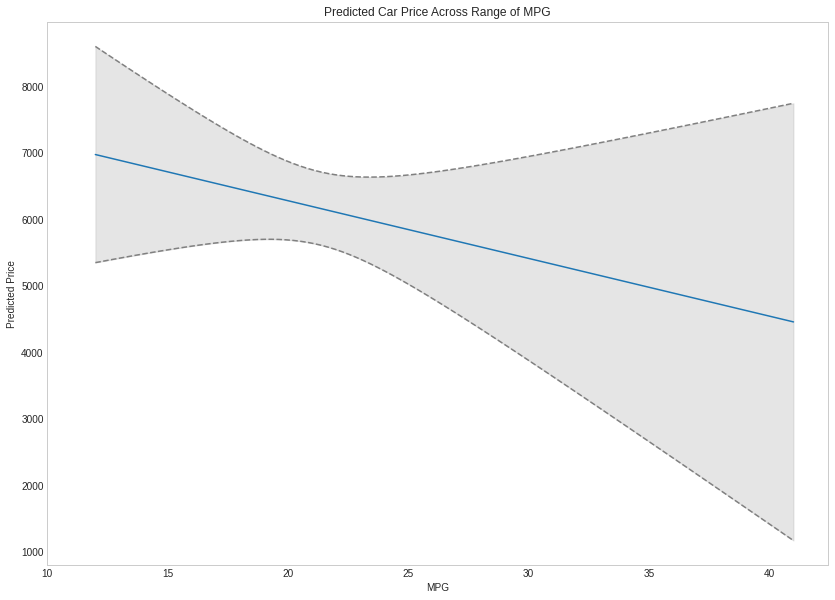

In [15]:
plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(figsize=(10,8))

ax.plot(df_oos.mpg, yhat1)
ax.plot(df_oos.mpg, lb, color='gray', linestyle='--')
ax.plot(df_oos.mpg, ub, color='gray', linestyle='--')

ax.fill_between(df_oos.mpg, lb, ub, color='gray', alpha=.2)

ax.set_title('Predicted Car Price Across Range of MPG')
ax.set_xlabel('MPG')
ax.set_ylabel('Predicted Price')
ax.set_xticks(ticks=range(10,41,5))
plt.grid(False)
#ax.set_facecolor('white') # some more design 

fig.set_size_inches(14,10)
plt.show()

In [16]:
plt.style.available #extra: to play with theme of the graph

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# The end!

- We can see that **when holding other variables at their mean values**, as MPG increases the predicted price of the car decreases (which does not make sense :)). Note that this variable is not statistically significant, so I use it for ploting purposes.  